# Classwise

This notebook discusses Multi-label classification methods using classwise for the [academia.stackexchange.com](https://academia.stackexchange.com/).

## Table of Contents
* [Data import](#data_import)
* [Data preparation](#data_preparation)
* [Methods](#methods)
* [Evaluation](#evaluation)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from joblib import dump, load
from pathlib import Path
from academia_tag_recommender.definitions import MODELS_PATH
from academia_tag_recommender.classifier import Classifier, available_classifier_paths

RANDOM_STATE = 0

<a id='data_import'/>

## Data import

In [2]:
from academia_tag_recommender.data import documents
from academia_tag_recommender.test_train_data import get_X_reduced, get_y, get_test_train_data
from academia_tag_recommender.preprocessing_definition import PreprocessingDefinition

def get_X():
    return np.vstack([document.text for document in documents])
y = get_y()

X_train, X_test, y_train, y_test = get_test_train_data(get_X(), y, scale=False)
print('Train set with shape ', X_train.shape)
print('Test set with shape', X_test.shape)

preprocessing = PreprocessingDefinition('tfidf', 'basic', 'basic', 'english', '1,1', 'TruncatedSVD')
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = get_test_train_data(get_X_reduced(preprocessing), y)

preprocessing = PreprocessingDefinition('count', 'basic', 'basic', 'english', '1,1', 'TruncatedSVD')
X_train_count, X_test_count, y_train_count, y_test_count = get_test_train_data(get_X_reduced(preprocessing), y)

Train set with shape  (24812, 1)
Test set with shape (8270, 1)


<a id='data_preparation'/>

## Data Preparation

In [3]:
from academia_tag_recommender.embedded_data import word2vec, doc2vec, fasttext2vec

In [4]:
def get_data(embedding):
    if embedding == 'word2vec':
        X_train_, X_test_ = word2vec(X_train, X_test)
        return X_train_, X_test_, y_train, y_test
    elif embedding == 'doc2vec':
        X_train_, X_test_ = doc2vec(X_train, X_test, y)
        return X_train_, X_test_, y_train, y_test
    elif embedding == 'fasttext':
        X_train_, X_test_ = fasttext2vec(X_train, X_test)
        return X_train_, X_test_, y_train, y_test
    else:
        return X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf

In [5]:
paths = available_classifier_paths('classwise')
def create_classifier(classifier_options, name, embedding=''):
    path = [path for path in paths if name in path.name and embedding in path.name]
    if len(path) > 0:
        clf = load(path[0])
    else:
        preprocessing = PreprocessingDefinition(embedding, 'basic', 'basic', 'english', '1,1', 'None')
        classifier = ClasswiseClassifier(classifier_options, embedding)
        clf = Classifier(classifier, preprocessing, name)
        X_train_, X_test_, y_train_, y_test_ = get_data(embedding)
        clf.fit(X_train_, y_train_)
        clf.score(X_test_, y_test_)
        clf.save('classwise')
    print('Training: {}s'.format(clf.training_time))
    print('Test: {}s'.format(clf.test_time))
    clf.evaluation.print_stats()

<a id='methods'/>

## Methods



In [6]:
from academia_tag_recommender.classwise_classifier import ClasswiseClassifier, ClassifierOption
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

**Word2Vec**

In [7]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-just-classwise', 'word2vec')

Training: 40.99938607215881s
Test: 2.006772041320801s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011963978870998536     0.07122128174123338      0.3429262394195889       0.18165255945183392      0.22301347382967696      
micro                                                            0.7113381410256411       0.16983117317901383      0.2741979074167021       
macro                                                            0.2585835543111682       0.058499030317553706     0.08194782373178347      


In [8]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-just-classwise', 'word2vec')

Training: 26.433114767074585s
Test: 2.134817123413086s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012242728950550499     0.06698911729141475      0.3065437323659815       0.16169488109633212      0.19828458186982975      
micro                                                            0.6786324786324787       0.15189631259266345      0.2482316620422838       
macro                                                            0.21741513180183605      0.043474414100105614     0.06338756978074211      


In [9]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-just-classwise', 'word2vec')

Training: 5947.577916383743s
Test: 16.87677550315857s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012558391141093363     0.07327690447400242      0.4727871825876663       0.32349254332930266      0.35556806622102866      
micro                                                            0.549737777025884        0.31082309053517626      0.39711588402431947      
macro                                                            0.3899978904694829       0.18838760504552896      0.2379429257810627       


**Doc2Vec**

In [10]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-just-classwise', 'doc2vec')

Training: 953.0323791503906s
Test: 3.3697092533111572s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013204989499140838     0.043047158403869405     0.03484482063683998      0.014254332930270053     0.01936085679737433      
micro                                                            0.6739130434782609       0.014826151418049644     0.029013992231737562     
macro                                                            0.05340125261908682      0.004013353823694884     0.0069530644394413185    


In [11]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-just-classwise', 'doc2vec')

Training: 51.92683029174805s
Test: 3.3696858882904053s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013251447845732832     0.04353083434099154      0.05585679737433062      0.026543732365981457     0.03359906719640698      
micro                                                            0.5405405405405406       0.027739251040221916     0.05277044854881267      
macro                                                            0.12141424579502852      0.010742051674655608     0.018209943214223215     


In [12]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-just-classwise', 'doc2vec')

Training: 6225.339820861816s
Test: 13.038621664047241s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.014197798001654681     0.040991535671100365     0.13445988043932422      0.07451833937928254      0.08819992650101476      
micro                                                            0.34444444444444444      0.07413075709024822      0.12200401432563265      
macro                                                            0.11916055910057649      0.030516262144246006     0.04491080096266438      


**FastText**

In [13]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-just-classwise', 'fasttext')

Training: 36.14921712875366s
Test: 2.1597187519073486s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011859606695093235     0.07569528415961306      0.3543530834340991       0.1918178153970173       0.23348620947774512      
micro                                                            0.719159599074788        0.178439906260462        0.2859332490324558       
macro                                                            0.3353460121781162       0.0763448382068266       0.11008078684413497      


In [14]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-just-classwise', 'fasttext')

Training: 27.74868369102478s
Test: 2.207108974456787s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012248456691911156     0.06747279322853689      0.2925231761386538       0.1556247480854494       0.19039759313640814      
micro                                                            0.6897968500342387       0.14453106317853556      0.23898774219058916      
macro                                                            0.22268039247211324      0.0402772736963378       0.060017141224246465     


In [15]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-just-classwise', 'fasttext')

Training: 6527.22895860672s
Test: 23.020677089691162s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012430471584038694     0.07218863361547763      0.48785570334542516      0.33093107617896006      0.3643924649849681       
micro                                                            0.5577261675190743       0.3181405136544072       0.4051650627360215       
macro                                                            0.42910249330931716      0.22032412208519392      0.27468297679107717      


**TFIDF**

In [16]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-just-classwise', 'tfidf')

Training: 1285.4960446357727s
Test: 16.543461561203003s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.015641825240246928     0.04087061668681983      0.3776967812517994       0.3321644498186215       0.32433883595915036      
micro                                                            0.3936219469846047       0.32537556214716296      0.35625982189628075      
macro                                                            0.46897498769132756      0.2355122047667688       0.29701797487852954      


In [17]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-just-classwise', 'tfidf')

Training: 632.9428861141205s
Test: 16.7802734375s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012820594412270094     0.06650544135429262      0.4128375654977831       0.2733071342200726       0.30509827066658984      
micro                                                            0.5364748964055122       0.2663381494593819       0.35595767128105116      
macro                                                            0.5587547035149126       0.15674711965235702      0.22756263854023767      


In [18]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-just-classwise', 'tfidf')

Training: 19546.539471149445s
Test: 58.15700554847717s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012407560618596067     0.07448609431680774      0.44932515690677727      0.2975937122128174       0.33207251300358914      
micro                                                            0.5661584792019575       0.28781934743086784      0.3816290281654403       
macro                                                            0.524363828804831        0.22012319968268515      0.2941992465503471       


**Count**

In [19]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-just-classwise', 'count')

Training: 1450.1509926319122s
Test: 17.691282510757446s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01579901991981162      0.04171704957678356      0.37710902861749296      0.33011084240225713      0.32226744906309596      
micro                                                            0.3896252940838928       0.3236724187243779       0.35359979169378986      
macro                                                            0.47051382999823643      0.23566472974249908      0.2964273312442649       


In [20]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-just-classwise', 'count')

Training: 643.9590280056s
Test: 16.968777656555176s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012820594412270094     0.06650544135429262      0.4128375654977831       0.2733071342200726       0.30509827066658984      
micro                                                            0.5364748964055122       0.2663381494593819       0.35595767128105116      
macro                                                            0.5587547035149126       0.15674711965235702      0.22756263854023767      


In [21]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-just-classwise', 'count')

Training: 21121.991340875626s
Test: 57.757832527160645s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012407560618596067     0.07448609431680774      0.44932515690677727      0.2975937122128174       0.33207251300358914      
micro                                                            0.5661584792019575       0.28781934743086784      0.3816290281654403       
macro                                                            0.524363828804831        0.22012319968268515      0.2941992465503471       


<a id='evaluation'/>

## Evaluation

In [22]:
paths = available_classifier_paths('classwise')
paths = [path for path in paths if 'just-classwise' in path.name]

In [23]:
evals = []
for path in paths:
    clf = load(path)
    evaluation = clf.evaluation
    evals.append([str(clf) + ' ' + str(clf.preprocessing.vectorizer), evaluation])

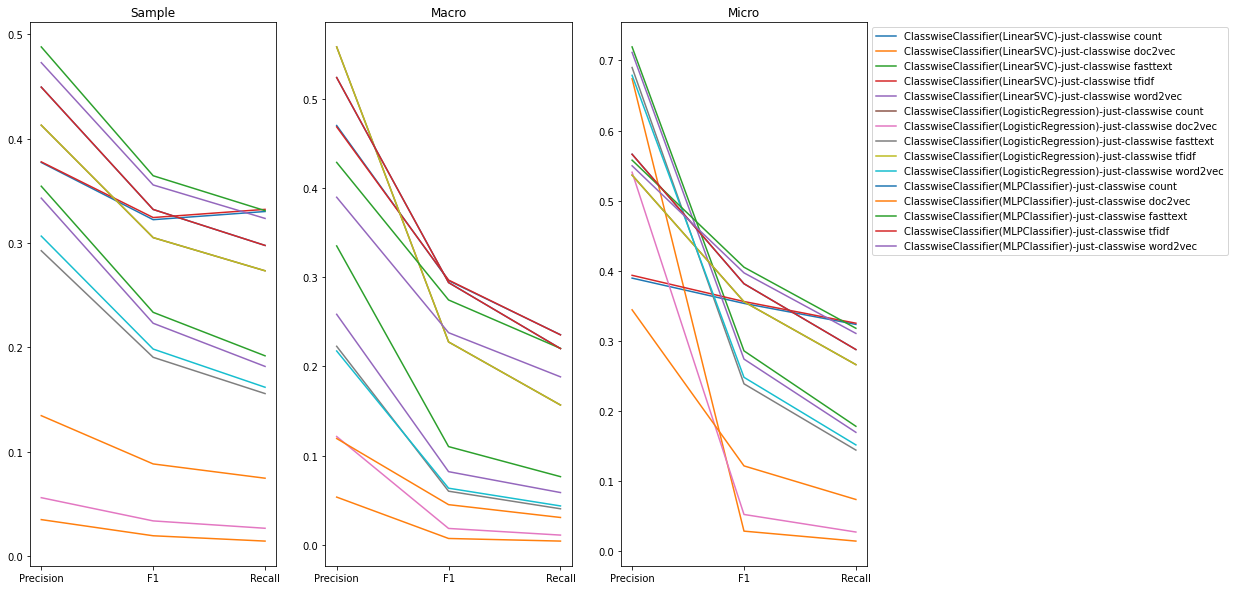

In [24]:
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro], label=eval_[0])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro], label=eval_[0])
axes[2].legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [25]:
top_3 = sorted(paths, key=lambda x: load(x).evaluation.recall_macro, reverse=True)[:3]

In [26]:
def per_label_accuracy(orig, prediction):
    if not isinstance(prediction, np.ndarray):
        prediction = prediction.toarray()
    l = 1 - orig - prediction
    return np.average(l, axis=0)

In [27]:
from sklearn.metrics import classification_report
classwise_results = []
for clf_path in top_3:
    clf = load(clf_path)
    _, X_test_, _, y_test_ = get_data(clf.preprocessing.vectorizer)
    prediction = clf.predict(X_test_)
    label_accuracies = per_label_accuracy(y_test_, prediction)
    report = classification_report(y_test_, prediction, output_dict=True, zero_division=0)
    classwise_report = {}
    for i, result in enumerate(report):
        if i < len(label_accuracies):
            classwise_report[result] = report[result]
            classwise_report[result]['accuracy'] = label_accuracies[int(result)]
    classwise_results.append((str(clf) + ' ' + str(clf.preprocessing.vectorizer), classwise_report))

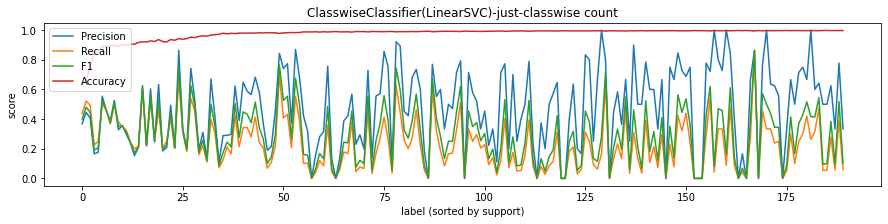

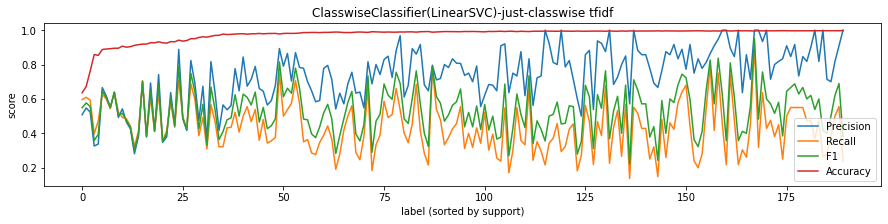

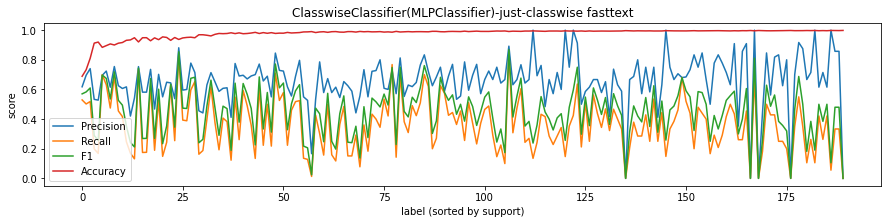

In [28]:
import numpy as np
x_ = np.arange(0, len(y_test[0]))
for classwise_result in classwise_results:
    name, results = classwise_result
    _, fig_1 = plt.subplots(figsize=(15,3))
    fig_1.set_title(name)
    sorted_results = sorted(results, key=lambda x: results[x]['support'], reverse=True)
    fig_1.plot(x_, [results[result]['precision'] for result in sorted_results][0:len(x_)], label='Precision')
    fig_1.plot(x_, [results[result]['recall'] for result in sorted_results][0:len(x_)], label='Recall')
    fig_1.plot(x_, [results[result]['f1-score'] for result in sorted_results][0:len(x_)], label='F1')
    fig_1.plot(x_, [results[result]['accuracy'] for result in sorted_results][0:len(x_)], label="Accuracy")
    fig_1.set_xlabel('label (sorted by support)')
    fig_1.set_ylabel('score')
    fig_1.legend(loc='best')
plt.show()